In [1]:
!pip install torch_geometric


In [2]:
pip install torch-cluster -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html


In [3]:
from torch_geometric.datasets import Actor
from models import SAGEConv, GCNConv
from model_utils import train
from torch_geometric.nn import Node2Vec
from node_embeddings import train_Node

In [4]:
data = Actor('../data')
df = data[0]


In [5]:
df

Data(x=[7600, 932], edge_index=[2, 30019], y=[7600], train_mask=[7600, 10], val_mask=[7600, 10], test_mask=[7600, 10])

In [6]:
model_Node = Node2Vec(df.edge_index,
                    embedding_dim=50,
                     walk_length=30,
                     context_size=10,
                     walks_per_node=20,
                     num_negative_samples=1,
                     p=200, q=1,
                     sparse=True)

In [7]:
train_Node(model_Node)

100%|██████████| 238/238 [01:08<00:00,  3.50it/s]


Epoch: 00, Loss: 2.1191


100%|██████████| 238/238 [01:02<00:00,  3.78it/s]


Epoch: 01, Loss: 0.9463


100%|██████████| 238/238 [01:06<00:00,  3.57it/s]


Epoch: 02, Loss: 0.8564


100%|██████████| 238/238 [01:02<00:00,  3.80it/s]


Epoch: 03, Loss: 0.8364


100%|██████████| 238/238 [01:01<00:00,  3.88it/s]

Epoch: 04, Loss: 0.8290


In [9]:
labels = df.y.detach().cpu().numpy()
node_embeddings = model_Node().detach().cpu().numpy()

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(node_embeddings, labels,
                                                        test_size=0.1,
                                                        stratify=labels)

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(train_x, train_y)

preds = classifier.predict(test_x)

In [17]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(preds, test_y)}')

Accuracy: 0.23289473684210527


In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

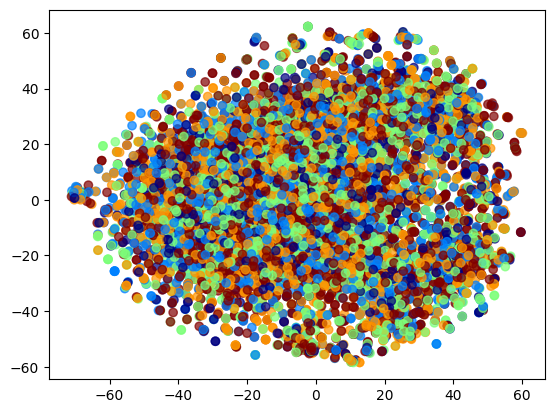

In [20]:
import matplotlib.pyplot as plt

plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
                c=labels, cmap='jet', alpha=0.7)

In [40]:
model_GNN = GCNConv(-1,10)

In [41]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

In [42]:
optimizer = Adam(model_GNN.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()

In [51]:
 node_embeddings_pre = model_GNN(df.x, df.edge_index)

In [52]:
node_embeddings_pre_detached = node_embeddings_pre.detach().numpy()

In [45]:
tsne = TSNE(n_components=2)
node_embeddings_2d_pre = tsne.fit_transform(node_embeddings_pre_detached)

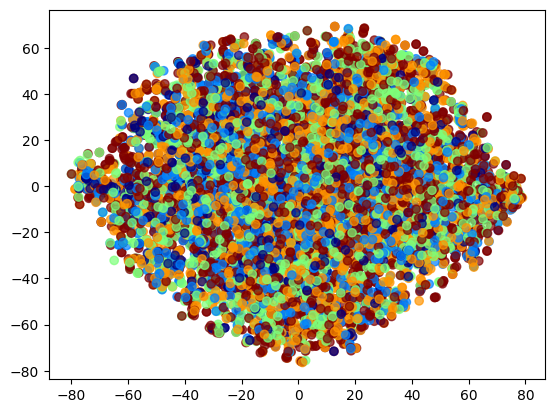

In [46]:
plt.scatter(node_embeddings_2d_pre[:, 0], node_embeddings_2d_pre[:, 1],
                c=labels, cmap='jet', alpha=0.7)

In [47]:
train(model_GNN, df, optimizer, criterion, 10)

Epoch: 000, Loss: 2.3243
Epoch: 001, Loss: 2.3247
Epoch: 002, Loss: 2.3235
Epoch: 003, Loss: 2.3210
Epoch: 004, Loss: 2.3211
Epoch: 005, Loss: 2.3221
Epoch: 006, Loss: 2.3209
Epoch: 007, Loss: 2.3200
Epoch: 008, Loss: 2.3192
Epoch: 009, Loss: 2.3177


In [53]:
 node_embeddings_after = model_GNN(df.x, df.edge_index)

In [54]:
node_embeddings_after_detached = node_embeddings_pre.detach().numpy()

In [55]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(node_embeddings_after_detached, labels,
                                                        test_size=0.1,
                                                        stratify=labels)

In [57]:
classifier_GNN = RandomForestClassifier(n_estimators=50)
classifier_GNN.fit(train_x, train_y)

preds_GNN = classifier_GNN.predict(test_x)

In [58]:
print(f"Accuracy score: {accuracy_score(preds_GNN,test_y)}")

Accuracy score: 0.2565789473684211


In [38]:
tsne = TSNE(n_components=2)
node_embeddings_2d_after = tsne.fit_transform(node_embeddings_after_detached)

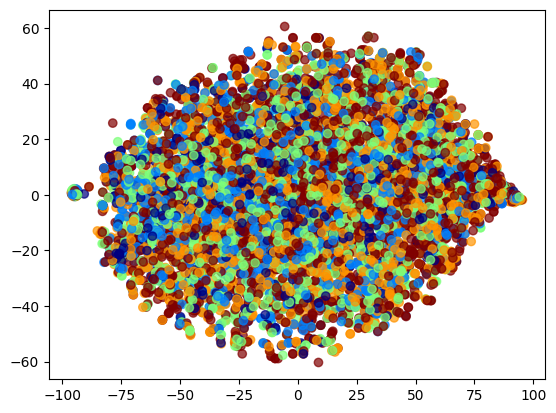

In [39]:
plt.scatter(node_embeddings_2d_pre[:, 0], node_embeddings_2d_pre[:, 1],
                c=labels, cmap='jet', alpha=0.7)